# Lab Test 2023 - MATH5335

In [249]:
# Q1
import numpy as np
import scipy 
import matplotlib.pyplot as plt
n = 10
A = np.ones((10,10))
# symetric array
diag = 1
for row in range(0, len(A)):
    for col in range(0, len(A)):
        if row == col:
            A[row][col] = diag
            diag+= 1
        else:
            A[row][col] = (row + col + 1) / (row + col + 2)

a_6_6 = A[5, 7]
a_7_7 = A[6,6]
a_3_9 = A[2,4]
print(a_6_6,  " " , a_7_7,  " " , a_3_9)

0.9285714285714286   7.0   0.875


In [160]:
Acheck = scipy.linalg.norm(A.T @ A - np.eye(10), 2)
Bcheck = scipy.linalg.norm(A.T @ A - np.identity(10), 2)
print(Acheck)
print(Bcheck)
comment1 = 'no'

211.47940499078123
211.47940499078123


(d) For a matrix to be orthgonal by defnition A.T A = I. Clearly since ||A.TA - I_(10))||_2 it contains eigenvalues thus is cant be the zero vector comment

In [66]:
cond = np.linalg.cond(A)
cond

30.188374647312617

In [116]:
eig = np.linalg.eigvals(A)
eig1, eigvector = np.linalg.eig(A)
EigA = np.sort(eig1)
print(EigA)

[ 0.48285718  1.41650828  2.41176177  3.42628632  4.4500975   5.48131521
  6.52128313  7.57497945  8.65823786 14.57667332]


(g) Since x.t A * x > 0, all eigvalues > 0 clearly all eigvalues the smalled is 0.48 > 0 thus yes A is positve defnited

In [126]:
Q, R = scipy.linalg.qr(A)
print(Q)
print(R)

[[-0.37092342  0.31696013  0.19939642  0.18227859  0.19126087  0.21387444
   0.24948543  0.30339693  0.38980848 -0.54808881]
 [-0.24728228 -0.93923315  0.07945056  0.06217847  0.05793682  0.05992105
   0.06658157  0.07861717  0.09926381 -0.13820182]
 [-0.27819256  0.01583026 -0.95534053  0.03447723  0.02928357  0.02802573
   0.02940622  0.03339046  0.04111761 -0.05639881]
 [-0.29673873  0.03167827  0.05753682 -0.95131587  0.0190171   0.01704837
   0.01690418  0.01837709  0.02195304 -0.02953894]
 [-0.30910285  0.04106959  0.06755513  0.08451244 -0.94348245  0.01193905
   0.01124473  0.0116939   0.01350438 -0.0177607 ]
 [-0.31793436  0.04714873  0.07423576  0.09155301  0.10847081 -0.93310421
   0.00819559  0.00816428  0.00909621 -0.01165757]
 [-0.32455799  0.05134121  0.07895375  0.09659092  0.11393565  0.13432659
  -0.91939763  0.00607912  0.00652895 -0.00813299]
 [-0.3297097   0.05437374  0.08243357  0.10034717  0.11803774  0.13891767
   0.16610745 -0.90032665  0.00491289 -0.00593604]


In [152]:
Rd = np.diag(R)[0:5]
Rd

array([-2.69597431, -1.35202226, -2.17403607, -3.04747214, -3.9257866 ])

array([-2.69597431, -1.35202226, -2.17403607, -3.04747214, -3.9257866 ])

# Question 2

In [321]:
tdat=np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ydat=np.array([275.99, 407.67, 509.42, 803.62, 1135, 1652.7, 1221.6, 1068.3, 1265.7, 1480])
teval = np.arange(1.5,9.5, 1)
#help(scipy.interpolate.CubicSpline)
cs = scipy.interpolate.CubicSpline(tdat, ydat)
yspteval = cs(teval)
print(yspteval)

[ 369.55547643  438.30202357  648.82142928  934.23600932 1458.03203345
 1501.42585688 1075.28953903 1145.67848699]


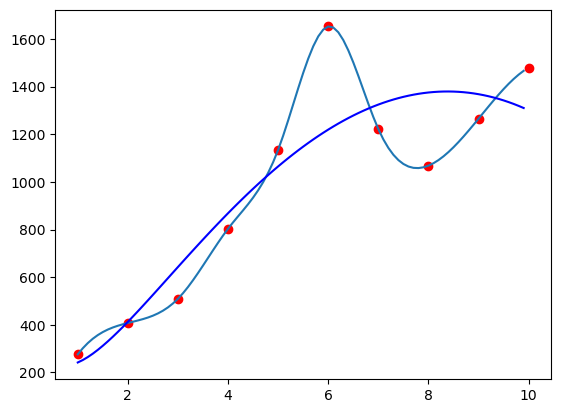

In [329]:
# (c) 
#create a function A [1, sqrt(t), t, t^2) 
#use lstq 
# first ones is residuals
A = np.ones((len(ydat), 4))
A[:,0] = 1
A[:,1] = np.sqrt(tdat)
A[:,2] = tdat 
A[:,3] = tdat**2
#help(scipy.linalg.lstsq)
ls = scipy.linalg.lstsq(A, ydat)
xls = ls[0]

teval = np.arange(1.5, 9.5)
yteval = []

def f(teval):
    q = xls[0] + xls[1]*sqrt(teval) + xls[2]*teval + xls[3] * teval** 2
    return q
    
for value in teval:
    y_val = f(value)
    yteval.append(y_val)


tplt = np.arange(1, 10, 0.1)
spline_y = cs(tplt)
lstsq = xls[0] + xls[1]*sqrt(tplt) + xls[2]*tplt + xls[3] * tplt** 2

plt.figure(1)
plt.scatter(tdat, ydat, color='red')
plt.plot(tplt, spline_y)
plt.plot(tplt, lstsq, color='blue')
plt.show()



[  804.14811989 -1376.39255803   850.57279554   -36.56575082]


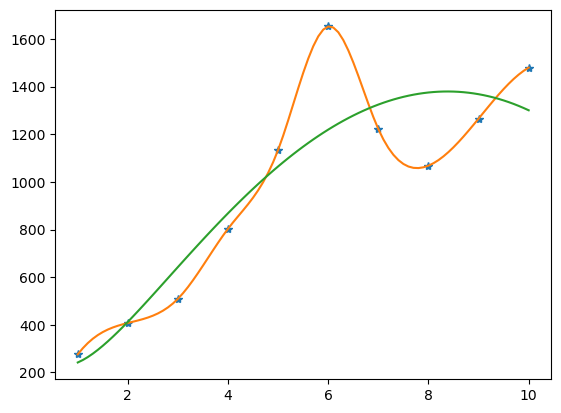

In [271]:
from numpy import ones,sqrt,array,linspace
from matplotlib.pyplot import plot
from scipy.linalg import lstsq
from scipy.interpolate import CubicSpline
tdat=array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ydat = array([275.99, 407.67, 509.42, 803.62, 1135, 1652.7, 1221.6, 1068.3, 1265.7, 1480])
teval = linspace(1.5,9.5,9)
pp = CubicSpline(tdat, ydat)
yspteval = pp(teval)
A = ones((10,4))
A[:,1]= sqrt(tdat)
A[:,2]= tdat
A[:,3]=tdat**2
xls = lstsq(A,ydat)[0]
print(xls)
yteval = xls[0] + xls[1]*sqrt(teval) + xls[2]*teval + xls[3] * teval** 2;
tplt = linspace(1,10,91)
ypltspline = pp(tplt)
ypltls = xls[0] + xls[1]*sqrt(tplt) + xls[2]*tplt + xls[3] * tplt**2; plot(tdat,ydat,'*', tplt,ypltspline,tplt,ypltls)